#1. Bienvenidos a los notebook's correspondientes a mi proyecto de tesis 
# *Preservando la privacidad en la justicia: Differential Privacy aplicado a la apertura de expedientes judiciales* 

### Introducción 

La apertura de datos en la justicia persigue dos fines: brindar transparencia a los actos de gobierno del poder judicial, y hacer accesible al público información de interés contenida en sus documentos. De este modo, no sólo se implementan prácticas destinadas a incrementar la transparencia del poder judicial, sino que se hace circular cierta información reflejada en las causas que puede contribuir al bienestar social, a través del desarrollo científico y la circulación en general de la misma.

Aunque existen varios mecanismos por los que la información se hace pública, en la Argentina y en otros países lo que tradicionalmente se emplean son dos estrategias. 


1.   Al ser actos de gobierno, en la Argentina, las sentencias son
de acceso público. Por ello, los textos de las mismas pueden ser consultados por cualquiera. En general, muchos juzgados optan por publicar sus resoluciones on line, aplicando sobre el texto técnicas básicas de anonimización. Sobre este mecanismo de distribución de la información no trabajaremos, ya que se encuentra plenamente reglado dentro de la ley, y a priori no presenta mayores amenazas a la privacidad de los involucrados (aunque podría problematizarse de cara al futuro si la publicación on-line de las sentencias representa una violación a las expectativas de privacidad de los involucrados en las causas).

2.   La información de las causas también es publicada en formato tabular estructurado. Estas publicaciones, contienen datos y metadatos de las causas, relativos a las resoluciones, pero también a la naturaleza del delito, de los acusados y de las víctimas. Aunque se siguen los mismos lineamientos de anonimización básicos que en el mecanismo anterior, este tipo de publicaciones SÍ supone un severo riesgo a la privacidad de los involucrados. Los involucrados en las causas tienen expectativa de privacidad, ya que aunque son consientes que los procesos pueden ser públicos y las sentencias son siempre de acceso público, no esperan que datos de las mismas sean facilitados por las autoridades en formatos digitales, de fácil y rápido abordaje por cualquier individuo, en cualquier parte del mundo. Sobre este mecanismo de distribución estaremos trabajando para proponer una estrategia que permita abrir estos datos, pero sin riesgos a la privacidad de los individuos.







### Colaboración con el Juzgado 10 de CABA

Para el presente proyecto estamos trabajando en colaboración con el Juzgado Penal N° 10 de la Ciudad De Buenos Aires, a cargo del Dr. Pablo Casas. Este tribunal, junto a otros de la ciudad y del país, se halla impulsando prácticas de justicia abierta. En este sentido, el acceso a la información contenida en las sentencias es una prioridad para el juzgado. No obstante, consientes de los riesgos que supone a la privacidad de los individuos, se hallan buscando soluciones superadoras.

El juzgado N° 10 nos proveyó con datos en formato tabular correspondientes a resoluciones que abarcan de 2016 a la actualidad. Nuestro desafío es proponer sobre este dataset alternativas para poder compatibilizar la apertura de la información, y la privacidad de los individuos. Adicionalmente, de este trabajo saldrán recomendaciones para el futuro, de cara a pensar sistemas más eficientes de apertura y acceso a la información judicial a nivel nacional, no sólo limitados a la práctica de este juzgado.

### Objetivos del trabajo

En este trabajo buscaremos presentar una solución para distribuir la información contenida en los datasets tabulares mencionados anteriormente, pero que permita mantener la privacidad de las partes involucradas. Para ello, aplicaremos mecanismos de Differential Privacy. La entrega final del ejercicio no será un conjunto de datos ya procesado, sino un pipeline de trabajo incluyendo el pre - procesamiento de los datos, técnicas y algoritmos utilizados, y elección de parámetros. 

Es importante remarcar que el formato de salida de los datos del pipeline propuesto será distinto al de entrada. En lugar de tener como producto final un dataset tabular anonimizado, la salida de los mecanismos de Differencial Privacy que propondremos tendrán la forma de tablas de frecuencia de  distribución univariadas. Es decir, para cada columna de la tabla original, construiremos una tabla de frecuencias distinta.



### Un repaso rápido de Differential Privacy

Differential Privacy se basa no en una técnica sino una garantía. Es decir, no existe un "algoritmo de Differential Privacy", sino diversos mecanismos e implementaciones que conplen *CON* la garantía de Differential Privacy. 

La garantía de Differential es que no importa quien tenga acceso a un conjunto de datos que contiene información personal, éste nunca podrá confirmar, más allá de cierto grado, la existencia de un registro específico (correspondiente a un individuo) en dicho dataset. Es decir, nadie nunca podrá, a partir del análisis del dataset, inferir, más allá de cierto grado de probabilidad, que en dicho dataset se hallan considerados los registros de determinado individuo.

Una primera definición intuitiva sobre Differential Privacy (DP) nos dice que: siendo D una base de datos original con n registros y D’ una base de datos que contiene n-1 registros de la original, decimos que un mecanismo-función-consulta cumple con DP si: 

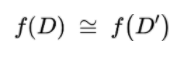





Esto quiere decir que, a pesar de que un registro se halle presente o no en una base de datos paralela, el resultado de cualquier consulta sobre la misma debe ser muy similar al resultado de una consulta sobre la original. Si esto se cumple, nadie podrá saber con certeza si un registro fue incluido o no en la base de datos parelela.

La definición formal de Differential Privacy sostiene que:

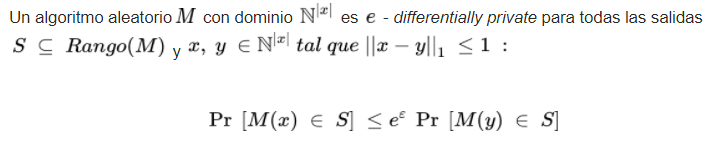

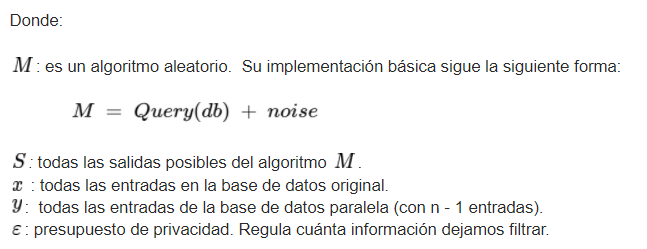

Básicamente lo que nos dice esta definición, es que la diferencia (proporcional) en las probabilidades condicionales de obtener determinada salida de una query, dado que se corrió sobre $x$ o sobre $y$ debe ser menor a $e^{\varepsilon}$. Recordemos, que esta restricción vale para todos los pares de puntos entre la base de datos original $x$ y todas las bases de datos $y$ paralelas  posibles. Esta restricción, otorga un límite teórico a la cantidad de información que un adversario puede ganar respecto a la inclusión de determinada observación en la base de datos.

En esta introducción no profundizaremos en los mecanismos existentes para alcanzar esta garantía. Para un desarrollo en profundidad de los mismos, sugerimos consultar el cuerpo de la tesis. Al respecto, basta decir que consideraremos dos mecanismos específicos a lo largo de los ejercicios que siguen. Ellos son los mecanismos laplaciano y gaussiano. Estos mecanismos son los que determinan el nivel de ruido a agregar a la salida de cada consulta. Lo que hacen es, a partir de ciertos parámetros como la sensibilidad de la consulta y el budget, tomar ruido aleatoriamente de cada una de las distribuciones mencionadas y adicionarlo a la salida de la consulta original, de forma tal que se cumplan las garantías de DP.

### Las consultas a realizar

La definición expuesta más arriba habla de algunos conceptos todavía vagos. Menciona el concepto de mecanismo y el concepto de consulta. Como implementaremos estos conceptos en nuestro trabajo?

Más arriba dijimos que el formato de salida de la información que proponemos (luego de aplicar DP), no es un dataset similar al original, sino tablas de distribución de frecuencias para cada atributo del dataset. Nosotros vamos a considerar la construcción de cada tabla de frecuencias individual como una consulta sobre la base de datos (en el cuerpo de la tesis complejizaremos esta definición, pero por ahora es suficiente para seguir con el abordaje del problema). 

Cada consulta generará una tabla de frecuencias. El mecanismo de DP lo que hará será agregar ruido a cada una de los conteos de la tabla. La distribución de donde se tomará el ruido será la misma para todos los valores de la tabla, aunque puede variar entre tablas en función del budget que le asignemos a cada una. Lo que buscamos nosotros es lograr un óptimo que garantice la privacidad de los individuos, cumpliendo con las restricciones de DP, pero que a la vez produzca una salida con calidad aceptable. Es decir, buscamos determinar, de ser posible, cómo implementar un mecanismo de DP que permita mejorar el estándar de privacidad de la información difundida, pero que permita mantener niveles aceptables de calidad.

### Las métricas de error que utilizaremos

En esencia, la salida de nuestro mecanismo de DP será una distribución de probabilidades para cada variable del dataset. Para tener una noción de que tan fidedigna es la salida, debemos compararla con la original, previa aplicación del mecanismo de DP. Existen muchas formas para comparar dos distribuciones de probabilidades ¿Cuál o cuáles son las ideales para nuestro caso?.

La primer medida que utilizaremos (que es la medida recomendada en la documentación del paquete `diffprivlib`) es el error absoluto. Esta medida computa la diferencia en términos absolutos entre el vector original y el nuevo. Es una medida sencilla y fácil de interpretar.

La segunda medida que utilizaremos es la divergencia KL. Esta medida cuantifica la diferencia entre dos distribuciones de probabilidades. Nos interesa porque no sólo da cuenta de la diferencia en términos absolutos, sino también de la distribución del error mismo. Por ejemplo, si una sola categoría tiene un error absoluto alto, el error absoluto promedio podría ser bajo. No obstante, la divergencia KL penalizaría esta diferencia en las distribución mucho más que el error absoluto, ya que la distribución de probabilidades es en una parte del dominio muy diferente. En general prestaremos atención a ambas métricas, aunque la divergencia KL provee información más compleja y es más aconsejable para medir la ganancia en la calidad de la información (aunque no nos proporciona una medida de error fácil de interpretar).

Para algunos ejercicios incluiremos otras medidas de error a fin de captar algunas particularidades de las transformaciones introducidas. No obstante, en general a lo largo del trabajo estaremos haciendo uso de estas dos medidas.

## Ahora sí! Comencemos! En este notebook encontrarán el primer acercamiento a los datos y algunas decisiones globales sobre el tratamiento de los registros. 

In [ ]:
!pip install diffprivlib

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import diffprivlib  as dp
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None)

##1.1 Analizando el dataset - Descarte de features

El primer paso del análisis consiste en una primera inspección del dataset a fin de determinar qué features tienen información de valor y cuales no y pueden descartarse. Esto es relevante, ya que cuando trabajamos en Diferencial Privacy, cuanta más información querramos revelar, más ruido debemos introducir en la salida. Por ello, debemos jerarquizar bien la información que se entregará, para encontrar un punto óptimo entre la usabilidad de la información y la garantía de privacidad.

Lo que haremos entonces, será descartar los features que no tienen información especialmente relevante, o que incluso teniéndola, presentan muchos valores faltantes, etc.

Para realizar un seguimiento al detalle de los criterios adoptados para la inclusión o exclusión de los atributos, sugerimos leer la correspondiente entrada en el texto de la tesis. En el siguiente apartado simplemente realizaremos los cómputos que dan sustento a nuestro análisis.

In [ ]:
###Conecto al drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
###Cargo Dataset. Voy a usar la columna N como índice del dataframe 
ds = pd.read_csv('/content/gdrive/MyDrive/datos_originales.csv', index_col=0)

In [ ]:
###Veo que columnas contiene
ds.columns

Index(['NRO_REGISTRO', 'FECHA_RESOLUCION', 'FIRMA', 'MATERIA',
       'ART_INFRINGIDO', 'CODIGO_O_LEY', 'CONDUCTA', 'CONDUCTA_DESCRIPCION',
       'VIOLENCIA_DE_GENERO', 'V_FISICA', 'V_PSIC', 'V_ECON', 'V_SEX', 'V_SOC',
       'V_AMB', 'V_SIMB', 'V_POLIT', 'MODALIDAD_DE_LA_VIOLENCIA',
       'FRASES_AGRESION', 'GENERO_ACUSADO/A', 'NACIONALIDAD_ACUSADO/A',
       'EDAD_ACUSADO/A AL MOMENTO DEL HECHO', 'NIVEL_INSTRUCCION_ACUSADO/A',
       'GENERO_DENUNCIANTE', 'NACIONALIDAD_DENUNCIANTE',
       'EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO', 'FRECUENCIA_EPISODIOS',
       'RELACION_Y_TIPO_ENTRE_ACUSADO/A_Y_DENUNCIANTE', 'HIJOS_HIJAS_EN_COMUN',
       'MEDIDAD_DE_PROTECCION_VIGENTES_AL_MOMENTO_DEL_HECHO', 'ZONA_DEL_HECHO',
       'LUGAR_DEL_HECHO\n', 'TIPO_DE_RESOLUCION', 'OBJETO_DE_LA_RESOLUCION',
       'DETALLE', 'DECISION', 'ORAL_ESCRITA', 'HORA_DE_INICIO',
       'HORA_DE_CIERRE', 'LINK', 'DURACION', 'SI_NO_RECURRENTE',
       'DECISION_CAMARA_DE_APELACIONES', 'N_REGISTRO_Y_TOMO_CAMARA',
 

##### La columna ZONA_DEL_HECHO nos puede interesar, veamos que información contiene.

In [ ]:
ds.ZONA_DEL_HECHO.value_counts()

zona_sur                     1695
zona_oeste                    813
zona_este                     676
no_corresponde                400
zona_norte                    176
s/d                            55
provincia_de_buenos_aires      36
más_de_una_zona                 1
Name: ZONA_DEL_HECHO, dtype: int64

##### Esta columna tiene un nivel de agregación que  hace que la información no sea muy útil.

Luego, vemos que hay un número importante de columnas con atributos relativos a causas de violencia de género. A priri esta información nos interesa, pero hagamos una revisión rápida de la misma.

##### Veamos a continuación, filtrando las causas de violencia de género, si estas columnas son portadoras de información de valor. Primero hagamos una revisión de sus valores, luego estudiemos la varianza (para ello asumimos que son columnas con valores binarios 0-1, en caso de ser necesario, reordenaremos los niveles para ajustarsse a esta definición).

---



In [ ]:
###Filtro causas de violencia de género y columnas de interés
ds_vio_gen = ds.loc[ds.VIOLENCIA_DE_GENERO=='si',['VIOLENCIA_DE_GENERO', 'V_FISICA', 'V_PSIC', 'V_ECON', 'V_SEX', 'V_SOC',
       'V_AMB', 'V_SIMB', 'V_POLIT']]

In [ ]:
###Analizo la distribución de valores para V_FISICA
ds_vio_gen.V_FISICA.value_counts()

si     580
no     486
s/d      2
SI       1
Name: V_FISICA, dtype: int64

In [ ]:
### Calculo Varianza de V_FISICA
ds_vio_gen.V_FISICA.apply(lambda x: 1 if x == 'si' else 0).var()

0.24842076496988535

In [ ]:
###Analizo la distribución de valores para V_PSIC
ds_vio_gen.V_PSIC.value_counts()

si     1064
s/d       3
SI        2
Name: V_PSIC, dtype: int64

In [ ]:
###Analizo la varianza para V_PSIC
ds_vio_gen.V_PSIC.apply(lambda x: 1 if x == 'si' else 0).var()

0.004659750615752711

In [ ]:
###AAnalizo la distribución de valores para V_ECON
ds_vio_gen.V_ECON.value_counts()

no     837
si     228
s/d      3
NO       1
Name: V_ECON, dtype: int64

In [ ]:
###Analizo la varianza para V_ECON
ds_vio_gen.V_ECON.apply(lambda x: 1 if x == 'si' else 0).var()

0.16795072576491565

In [ ]:
###Analizo la distribución de valores para V_SEX
ds_vio_gen.V_SEX.value_counts()

no     984
si      81
s/d      3
NO       1
Name: V_SEX, dtype: int64

In [ ]:
###Analizo la varianza para V_SEX
ds_vio_gen.V_SEX.apply(lambda x: 1 if x == 'si' else 0).var()

0.07009596283410793

In [ ]:
###Analizo la distribución de valores para V_SOC
ds_vio_gen.V_SOC.value_counts()

no     908
si     157
s/d      3
NO       1
Name: V_SOC, dtype: int64

In [ ]:
###Analizo la varianza para V_SOC
ds_vio_gen.V_SOC.apply(lambda x: 1 if x == 'si' else 0).var()

0.12541385942968736

In [ ]:
###Analizo la distribución de valores para V_AMB
ds_vio_gen.V_AMB.value_counts()

no     949
si     115
s/d      3
SI       2
Name: V_AMB, dtype: int64

In [ ]:
###Analizo la varianza para V_AMB
ds_vio_gen.V_AMB.apply(lambda x: 1 if x == 'si' else 0).var()

0.09609421805530825

In [ ]:
###Analizo la distribución de valores para V_SIMB
ds_vio_gen.V_SIMB.value_counts()

si     1066
s/d       3
Name: V_SIMB, dtype: int64

In [ ]:
###Analizo la varianza para V_SIMB
ds_vio_gen.V_SIMB.apply(lambda x: 1 if x == 'si' else 0).var()

0.0028011057272889143

In [ ]:
###Analizo la distribución de valores para V_POLIT
ds_vio_gen.V_POLIT.value_counts()

no    1068
Name: V_POLIT, dtype: int64

In [ ]:
###Analizo la varianza de V_POLIT
ds_vio_gen.V_POLIT.apply(lambda x: 1 if x == 'si' else 0).var()

0.0

De este conjunto de variables vinculadas a violencia de género, conservaremos únicamente V_FISICA, que es la de mayor varianza del conjunto. El resto de las variables, tienen una varianza más baja (o incluso 0), con lo que la información que pueden aportar es más bien reducida.

A continuación revisaremos las columnas GENERO_ACUSADO/A y GENERO_DENUNCIANTE, pero para todo el dataset. Son variables de interés, pero también sospechamos que pueden tener baja varianza (en general para los casos de violencia de género el agresor es masculino y el denunciante femenino, para el resto de las causas, no se recopilan esos datos, o no corresponden a personas físicas). Veamos.

In [ ]:
###Analizo la distribución de valores para GENERO_ACUSADO/A
ds['GENERO_ACUSADO/A'].value_counts()

varon                          3048
mujer                           367
usuario_de_facebook             139
persona_juridica                121
usuario_de_twitter               33
nn                               24
usuario_de_cuenta_de_google      23
usuario_de_instagram             22
s/d                              14
no_corresponde                   13
usuario_de_skype                 12
pagina_web                       10
usuario_de_mercado_libre          5
lgbtiq+                           4
usuario_de_chatstep               4
usuario_de_skout                  3
usuario_de_whatsapp               2
manifestantes                     2
usuario_de_youtube                2
personal_policial                 2
usuario_microsoft                 1
organo_jurisdiccional             1
usuario_de_imgur                  1
Name: GENERO_ACUSADO/A, dtype: int64

In [ ]:
###Analizo la varianza para GENERO_ACUSADO/A
ds['GENERO_ACUSADO/A'].apply(lambda x: 1 if x == 'varon' else 0).var()

0.16930102466210192

In [ ]:
###Analizo la distribución de valores  GENERO_DENUNCIANTE
ds['GENERO_DENUNCIANTE'].value_counts()

no_corresponde    2780
mujer             1068
s/d                  4
lgbtiq+              1
Name: GENERO_DENUNCIANTE, dtype: int64

En base a este cuadro, podemos suponer que esta variable puede portar información relevante. No obstante, sospechamos que
si desagregamos en base a las causas de violencia de género, el resultado sería diferente

In [ ]:
###Genero tabla de contingencia para las variables VIOLENCIA_DE_GENERO y GENERO_DENUNCIANTE
pd.crosstab(ds.VIOLENCIA_DE_GENERO, ds.GENERO_DENUNCIANTE)

GENERO_DENUNCIANTE,lgbtiq+,mujer,no_corresponde,s/d
VIOLENCIA_DE_GENERO,,,,
no,0,1,2780,3
si,1,1067,0,1


Al analizar la tabla de contingencia, vemos que la distribución condicional de GENERO_DENUNCIANTE tiene baja varianza. En todas las causas de violencia de género el denunciante ha sido mujer, muentras que para el resto de las causas 'no_corresponde' consignar tal dato. Por ello, descartaremos el atributo GENERO_DEUNCIANTE.

En base al breve análisis realizado y conocimiento del dominio, preseleccionamos los siguientes features para seguir trabajando. Más adelante haremos un análisis más detallado de los mismos.

In [ ]:
descartar = ['LINK', 'N_REGISTRO_Y_TOMO_CAMARA', 'LINK_CAMARA', 'N_REGISTRO_Y_TOMO_CAMARA_1', 'LINK_CAMARA_1', 'N_REGISTRO_Y_TOMO_TSJ', 'LINK_TSJ', \
             'N_REGISTRO_Y_TOMO_TSJ_1', 'LINK_TSJ_1', 'N_REGISTRO_Y_TOMO_CSJN', 'LINK_CSJN', 'MATERIA','ZONA_DEL_HECHO', 'FECHA_RESOLUCION', 'FIRMA', 'HORA_DE_INICIO', 'HORA_DE_CIERRE', \
             'DURACION', 'SI_NO_RECURRENTE', 'DECISION_CAMARA_DE_APELACIONES', 'SI_NO_RECURRENTE_CAMARA', 'DECISION_DE_ADMISIBILIDAD_CAMARA', \
             'QUEJA_Y_RECURRENTE', 'DECISION_DE_ADMISIBILIDAD_TSJ',  'DECISION_DE_FONDO_TSJ', 'RECURSO_EXTRAORDINARIO_Y_RECURRENTE', 'DECISION_CSJN', \
             'V_ECON', 'V_PSIC', 'V_SEX', 'V_SOC', 'V_AMB', 'V_SIMB', 'V_POLIT', 'FRASES_AGRESION', 'GENERO_ACUSADO/A', 'GENERO_DENUNCIANTE', 'ORAL_ESCRITA']
             
conservar = [x for x in ds.columns if x not in descartar]             

In [ ]:
len(descartar)

38

In [ ]:
ds = ds.loc[:,conservar].dropna(subset=['NRO_REGISTRO'])

## 1.2 Analisis de registros correlacionados

In [ ]:
###Analizo las dimensiones del dataset
ds.shape

(3853, 22)

##### Tenemos 3853 observaciones para el dataset. Recordemos que una de las asunciones básicas de Differencial Privacy (DP) es que los registros no se hallan correlacionados * (si hay registros correlacionados, deben aplicarse técnicas de Group Privacy). Lo primero que debemos hacer es verificar si existe correlación alguna entre ellos.


##### En base al conocimiento del dominio, sabemos que cada fila corresponde a un planteo. También sabemos que una misma resolución puede involucrar varios planteos sobre el mismo delito (o varios delitos). Entonces, sabemos que vamos a tener registros correlacionados. Para analizar esto, veamos cuantas resoluciones incluyen estos 3853 planteos que tenemos en el dataset. La columna NRO_REGISTRO contiene el id único de cada resolución. Todos los planteos que tienen el mismo NRO_REGISTRO, corresponden a la misma resolución.

###### * En el contexto de DP un registro correlacionado con otro es aquel que no es estadísticamente independiente. Por ejemplo, si un dataset tiene registros de enfermedades contagiosas, y hay varios indivudos de una misma familia, es posible que si se contagia uno, se contagen varios. En este caso, los registros estarían correlacionados. Otra caso más común donde encontramos registros correlacionado es en datasets sobre transacciones comerciales. Allí, un individuo puede aparecer varias veces, una por cada operación que haya realizado.

In [ ]:
###Cantidad de resoluciones únicas
len(ds['NRO_REGISTRO'].unique())

3071

In [ ]:
###Tabla de distribución de frecuencias de planteos por resolución
cont_registros = ds['NRO_REGISTRO'].value_counts().dropna().value_counts()
cont_registros.head(20)

1    2504
2     414
3     113
4      27
5       8
6       3
8       2
Name: NRO_REGISTRO, dtype: int64

##### Efectivamente vemos que estos 3853 planteos estan incluidos en 3071 resoluciones, teniendo algunas resoluciones hasta 8 planteos. 

##### Adicionalmente, la cantidad de planteos incluidos en una resolución no tiene límite teórico, y empíricamente en este dataset, llega hasta 8, pero nada garantiza que el en futuro no puedan este límite superior no sea mayor.

##### En casos donde hay registros correlacionados, lo que se debe hacer es encontrar una cota superior a ese valor. Si no existe, debe establecerse arbitrariamente. Debe considerarse que el ruido que deberá inyectarse para garantizar DP crecerá en función de este número de registros correlacionados (Group Privacy).

##### Probemos definiendo cotas superiores arbitrarias para la cantidad de registros correlacionados y veamos como varía el error promedio de los histogramas generados.

##### Para hacer esto, construiremos histogramas de todas las variables del dataset y dejaremos un epsilon fijo. Para acotar los registros correlacionados, en los casos que verifiquemos que superen la cota máxima establecida, seleccionaremos de forma aleatoria los registros que serán considerados (y los que se descartarán).

##### En los casos donde descartemos observaciones, estaremos comparando la salida procesada con DP, contra la distribución original (incluyendo también las observaciones descartadas). Así, la medida de error a la que llegaremos incluirá tanto el ruido introducido por la DP, como el efecto del descarte aleatorio de observaciones correlacionadas.

##### Para complejizar este análisis, además de generar el indicador antes referido, desagregaremos el error entre la contribución del descarte de observaciones y la contribución del mecanismo de DP. Para ello, correremos tres experimentos. Uno que calcula el error total, otro que calcula el error de aplicar DP sólo descartando observaciones (sin incrementar la sensibilidad de la función) y otro que calcula el error solo aplicando DP (sin descartar ninguna observación, pero incrementando la sensibilidad de la función). Aunque esta implementación de los mecanismos no garantiza DP, permite tener un insight a como impacta sobre el error cada uno de estos aspectos por separado.

##### Utilizaremos como medidas de error la divergencia de Kullback-Leibler y el error absoluto medio. 



Para llevar a cabo el experimento antes mencionado, implementamos dos funciones que permiten realizar los cálculos necesarios.

In [ ]:
def kl(p, q):
    """Kullback-Leibler divergence D(P || Q) for discrete distributions
    Parameters
    ----------
    p, q : array-like, dtype=float, shape=n
    Discrete probability distributions.
    """
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)
    q= np.where(q == 0, 0.000000001, q)###linea agregada por Lio para evitar division por 0. Consultar con PR

    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [ ]:
def sensibilidad_error(ds, descartar=True, cota=10):
  """
  Esta funcion estima la divergencia de Kullback-Leibler de un histograma construido aplicando DP respecto
  al original para cada columna del dataset de entrada. Asimismo, si existen registros 
  correlacionados (están correlacionados si comparten NRO_REGISTRO), realiza un sampleo aleatorio de 
  los mismos en función de la cota máxima de registros correlacionados ingresada
  como parámetro de la función. En estos casos, se compara el histograma resultante de 
  descartar estas observaciones, contra el dataset original, incluyendo estas observaciones.

  Parámetros
  ----------
  ds: DataFrame de Pandas
    Es el dataset que se analizará.
  descartar: booleano
    Indica si se descartarán los valores que superan la cota o no.
  cota: int
    Es un número que representa la cantidad máxima de registros correlacionados que 
    se conservarán en el conjunto de datos si descartar es True. También controla la sensibilidad del mecanismos de DP.
  
  Salida
  ------
  numpy array:
    Devuelve un array de numpy de longitud equivalente a la cantidad de columnas del
    dataset de entrada computando el error medio entre el histograma original y 
    10 histogramas generados aplicando DP. El budget utilizado es de 1 epsilon.
  """

  grouped = ds.groupby("NRO_REGISTRO")
  div_kl = []
  error_abs = []
  for i in range(0,250):###Realizo 250 veces las estimaciones

    if descartar == True:
      new_df = pd.DataFrame(columns=ds.columns)
      for key, group in grouped:
        if len(group)>cota:###Si hay registros correlacionados por sobre la cota, los sampleo
          idxs_filas = np.random.choice(range(0, len(group)), size=cota, replace=False).tolist()###Los selecciono de forma aleatoria
          group = group.reset_index(drop=True).iloc[idxs_filas, :]
        new_df = pd.concat([new_df, group])###Genero dataframe con la cantidad máxima de registros correlacionados establecidos en la cota máxima

    if descartar == False:
      new_df = pd.DataFrame(ds)

    div_kl_hist = []
    error_abs_hist = []

    for (columnName, columnData) in ds.loc[:, ~ds.columns.isin(["NRO_REGISTRO"])].iteritems():
      if columnName not in ['EDAD_ACUSADO/A AL MOMENTO DEL HECHO', 'EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO']:###Estas columnas deben transformarse a int
        ###Genero Hist sin DP
        hist, bins = np.histogram(pd.Categorical(columnData[ds['NRO_REGISTRO'].notna()]).codes)
        hist = hist / hist.sum()
        ###Genero Hist con DP
        dp_hist, dp_bins = dp.tools.histogram(pd.Categorical(new_df[columnName]).codes, sens=len(new_df.columns)*cota)
        ###dp_hist = dp_hist / dp_hist.sum()
        div_kl_hist.append(kl(hist, dp_hist))
        error_abs_hist.append(np.abs(hist - dp_hist).sum())
      else:
        ###Genero Hist sin DP
        vals = []
        for val in columnData[ds['NRO_REGISTRO'].notna()]:###Como hay valores no casteables a int, hago un try except. Los valores no casteables los descarto
          try: 
            vals.append(int(val))
          except:
            pass        
        hist, bins = np.histogram(vals)
        hist = hist / hist.sum()
        ###Genero Hist con DP
        vals = []
        for val in new_df[columnName]:###Como hay valores no casteables a int, hago un try except. Los valores no casteables los descarto
          try: 
            vals.append(int(val))
          except:
            pass
        dp_hist, dp_bins = dp.tools.histogram(vals, sens=len(new_df.columns)*cota)
        ###dp_hist = dp_hist / dp_hist.sum()
        div_kl_hist.append(kl(hist, dp_hist))
        error_abs_hist.append(np.abs(hist - dp_hist).sum())

  div_kl.append(div_kl_hist)
  error_abs.append(error_abs_hist)


    ###error.append(error_hist)
  return [np.mean(div_kl, axis=0).mean(), np.mean(error_abs, axis=0).mean()]
 

In [ ]:
###Calculamos las métricas de error total.
###Aclaración: 1 significa que no hay otro registro correlacionado (solo hay un registro por causa)! 
error_total = []
for cotas in range(1,10):
  error_total.append(sensibilidad_error(ds, cota=cotas))

In [ ]:
error_df = pd.DataFrame(error_total, index=['Sin registros corr.', '1 registro corr.', '2 registros corr.', '3 registros corr.', '4 registros corr.', '5 registros corr.', '6 registros corr.', '7 registros corr.', '8 registros corr.'], columns=['Divergencia KL', 'Error Absoluto medio'])

In [ ]:
pd.options.display.float_format = '{:.6f}'.format
error_df

,Divergencia KL,Error Absoluto medio
Sin registros corr.,0.054677,0.091246
1 registro corr.,0.105939,0.133872
2 registros corr.,0.228776,0.185102
3 registros corr.,0.194070,0.198614
4 registros corr.,0.384406,0.305479
5 registros corr.,0.584172,0.300782
6 registros corr.,0.441698,0.342741
7 registros corr.,0.801874,0.344020
8 registros corr.,0.659632,0.393362


[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8')]

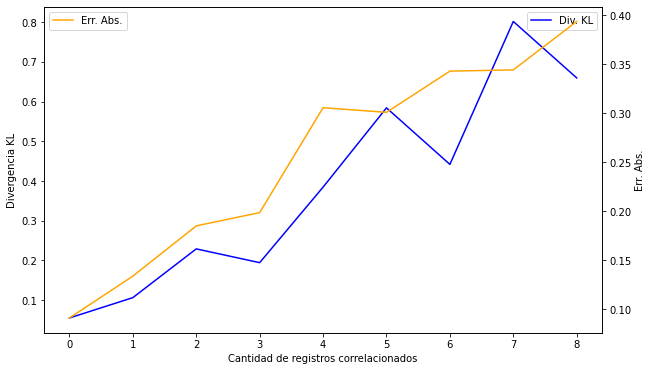

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax2 = ax.twinx()
ax.plot(error_df['Divergencia KL'], color = 'blue')
ax2.plot(error_df['Error Absoluto medio'], color = 'orange')
###ax.set_title('Contribución al error en función de la cantidad de registros correlacionados', fontsize = 20)
ax.legend(['Div. KL'])
ax2.legend(['Err. Abs.'])
ax.set_ylabel('Divergencia KL')
ax2.set_ylabel('Err. Abs.')
ax.set_xlabel('Cantidad de registros correlacionados')
ax.set_xticks([0,1,2,3,4,5,6,7,8])
ax.set_xticklabels([0,1,2,3,4,5,6,7,8])

##### Lo que podemos ver en el ejercicio anterior es que el error, medido a través de ambas métricas, se incrementa a medida que incluimos registros correlacionados en el dataset.

##### Si bien a priori podría creerse que descartar aleatoriamente registros correlacionados podría deteriorar mucho la calidad de la información, lo que se ve es lo contratrario.

##### Esto se debe a que el ruido introducido por el descarte aleatorio de observaciones, es bastante menor al ruido que debe introducirse para trabajar con Group Privacy y cumplir con DP.

##### Recordemos que en casos de registros correlacionados, la cantidad de ruido a agregar a la salida para garantizar DP escala linealmente con el número de los mismos.

##### La conclusión es que siempre que el descarte de registros no implique una pérdida de información inaceptable, ella será preferible a trabajar con Group Privacy. En el problema de este trabajo, vemos que la calidad de la información no sufre por este descarte. De todos modos, debe tenerse en cuenta que para algunas aplicaciones esto puede no ser aceptable.

En base a los resultados del experimento anterior, decidimos continuar trabajando SIN registros correlacionados. 

In [ ]:
###Eliminamos aleatoriamente los registros correlacionados del dataset para seguir trabajando
grouped = ds.groupby("NRO_REGISTRO")
new_df = pd.DataFrame(columns=ds.columns)
for key, group in grouped:
  if len(group)>1:
    idxs_filas = np.random.choice(range(0, len(group)), size=1, replace=False).tolist()
    group = group.reset_index(drop=True).iloc[idxs_filas, :]
  new_df = pd.concat([new_df, group])###Genero dataframe con la cantidad máxima de registros correlacionados establecidos en la cota máxima
ds = pd.DataFrame(new_df)      

In [ ]:
###Verifico que la cantidad de observaciones en el nuevo dataset correspondan a la cantidad de causas. Coinciden!!!
ds.shape

(3071, 22)

## 1.3 Particionando el dataset



En base al conocimiento del dominio sabemos que en este set de datos existen al menos dos subconjuntos de observaciones con características particulares. Por un lado tenemos registros vinculados a violencia de género y por otro lado, registros vinculados al resto de las causas penales que lleva el juzgado.

Estos dos subconjuntos tienen características muy diferentes por como está estructurado el dataset. De hecho, los registros sobre violencia de género tienen muchos atributos particulares, que en el caso de las otras causas son completados con valores nulos o "No corresponde".

En base a este criterio, decidimos particionar el dataset en función de estas categorías. Así, evitaremos el uso de tablas de contingencia, que implican mayores complejidades. Por otro lado, podremos tratar los features de la forma que sea más conveniente de acuedo a los tipos de registros. 

Volviendo a los conceptos sobre DP, esta operación de particionar el dataset nos permitirá decorrelacionar consultas (dos consultas están correlacionadas si para su respuesta se utilizan los mismos registros, es decir, si al menos un registro individual tiene impacto en la salida de ambas consultas) y reducir el ruido a incorporar a la salida. Asimismo, una ganancia potencial de esta estrategia, es la reducción de la sensibilidad total de las consultas. 

El abordaje propuesto se valdrá de la ventaja derivada de la composición paralela de las consultas. El presupuesto total utilizado para asegurar DP no va a ser la suma de los presupuestos aplicados en ambos datasets, sino el MAYOR presupuesto aplicado a cualquiera de ellos.

In [ ]:
ds_vio_gen = ds.loc[ds.VIOLENCIA_DE_GENERO=='si',:].drop(columns=['VIOLENCIA_DE_GENERO'])

In [ ]:
ds_vio_gen.columns

Index(['NRO_REGISTRO', 'ART_INFRINGIDO', 'CODIGO_O_LEY', 'CONDUCTA',
       'CONDUCTA_DESCRIPCION', 'V_FISICA', 'MODALIDAD_DE_LA_VIOLENCIA',
       'NACIONALIDAD_ACUSADO/A', 'EDAD_ACUSADO/A AL MOMENTO DEL HECHO',
       'NIVEL_INSTRUCCION_ACUSADO/A', 'NACIONALIDAD_DENUNCIANTE',
       'EDAD_DENUNCIANTE_AL_MOMENTO_DEL_HECHO', 'FRECUENCIA_EPISODIOS',
       'RELACION_Y_TIPO_ENTRE_ACUSADO/A_Y_DENUNCIANTE', 'HIJOS_HIJAS_EN_COMUN',
       'MEDIDAD_DE_PROTECCION_VIGENTES_AL_MOMENTO_DEL_HECHO',
       'LUGAR_DEL_HECHO\n', 'TIPO_DE_RESOLUCION', 'OBJETO_DE_LA_RESOLUCION',
       'DETALLE', 'DECISION'],
      dtype='object')

In [ ]:
###particiono el dataset y lo guardo en el drive
###ds.loc[ds.VIOLENCIA_DE_GENERO=='si',:].drop(columns=['VIOLENCIA_DE_GENERO']).to_csv('/content/gdrive/MyDrive/set_datos_I.csv', index=False)
###ds.loc[ds.VIOLENCIA_DE_GENERO!='si',:].drop(columns=['VIOLENCIA_DE_GENERO']).to_csv('/content/gdrive/MyDrive/set_datos_II.csv', index=False)

## 1.4 Continuamos el trabajo en los próximos notebooks:

##### En los notebook's 2.1 y 2.2 encontrará el abordaje para el set de datos de violencia de género (set de datos I).

##### En los notebook's 3.1 y 3.2 encontrará el abordaje para el set de datos con el resto de las causas (set de datos II).